<a href="https://colab.research.google.com/github/Matsalak-Viktoria/Team_3/blob/Chatbot/Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pyagrum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 9.3 MB/s eta 0:00:00


In [4]:
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt
from IPython.display import display,HTML

import os

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import math

In [5]:
bn=gum.BayesNet('PsyMonitor')

In [6]:
p = bn.add(gum.LabelizedVariable('p', 'Personality', 5))

In [7]:
!pip install azure-ai-language-conversations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.0/122.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.4/192.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.8.0 which is incompatible.


In [8]:
from google.colab import files
uploaded = files.upload()

Saving Items.csv to Items.csv


In [9]:
import csv
from azure.core.credentials import AzureKeyCredential
from azure.ai.language.conversations import ConversationAnalysisClient

clu_endpoint = "https://psymonitor.cognitiveservices.azure.com/"
clu_key = "fb821673335b408f9b324740f5c3291a"
project_name = "PsyMonitor"
deployment_name = "PsyMonitor"


def personalityFeedbackAnalyse(query):
    client = ConversationAnalysisClient(clu_endpoint, AzureKeyCredential(clu_key))
    with client:
        return client.analyze_conversation(
            task={
                "kind": "Conversation",
                "analysisInput": {
                    "conversationItem": {
                        "participantId": "1",
                        "id": "1",
                        "modality": "text",
                        "language": "it",
                        "text": query
                    },
                    "isLoggingEnabled": False
                },
                "parameters": {
                    "projectName": project_name,
                    "deploymentName": deployment_name,
                    "verbose": True
                }
            }
        )

count = 0

# Total sum of scores
sum_s_t = 0

# Sum of scores for Factor 1
sum_s_1 = 0

# Sum of scores for Factor 2
sum_s_2 = 0

# Sum of scores for Factor 3
sum_s_3 = 0

# Sum of scores for Factor 4
sum_s_4 = 0

# Sum of scores for Factor 5
sum_s_5 = 0



# Items from csv file
with open("Items.csv", "r") as file:
    for i, row in enumerate(csv.reader(file)):
        print(row[0])
        print("- Very Inaccurate \n- Moderately Inaccurate\n- Neither Accurate Nor Inaccurate"
              " \n- Moderately Accurate \n- Very Accurate")
        answer = input("Enter your answer: ")
        result = personalityFeedbackAnalyse(answer)
        if (i % 2 == 0 and i != 28 and i != 38 and i != 48) or i == 39 or i == 41 or i == 47 or i == 49:
            if result["result"]["prediction"]["topIntent"] == "StrongDisagree":
                answer = 1
            elif result["result"]["prediction"]["topIntent"] == "Disagree":
                answer = 2
            elif result["result"]["prediction"]["topIntent"] == "NeitherAgree":
                answer = 3
            elif result["result"]["prediction"]["topIntent"] == "Agree":
                answer = 4
            else:
                answer = 5
        else:
            if result["result"]["prediction"]["topIntent"] == "StrongDisagree":
                answer = 5
            elif result["result"]["prediction"]["topIntent"] == "Disagree":
                answer = 4
            elif result["result"]["prediction"]["topIntent"] == "NeitherAgree":
                answer = 3
            elif result["result"]["prediction"]["topIntent"] == "Agree":
                answer = 2
            else:
                answer = 1

        if count == 0:
            sum_s_1 += answer
            count += 1
        elif count == 1:
            sum_s_2 += answer
            count += 1
        elif count == 2:
            sum_s_3 += answer
            count += 1
        elif count == 3:
            sum_s_4 += answer
            count += 1
        else:
            sum_s_5 += answer
            count = 0

        sum_s_t += answer
        print()

val_1 = sum_s_1 / sum_s_t
val_2 = sum_s_2 / sum_s_t
val_3 = sum_s_3 / sum_s_t
val_4 = sum_s_4 / sum_s_t
val_5 = sum_s_5 / sum_s_t

print("Sum of scores for Factor 1:", sum_s_1)
print("Sum of scores for Factor 2:", sum_s_2)
print("Sum of scores for Factor 3:", sum_s_3)
print("Sum of scores for Factor 4:", sum_s_4)
print("Sum of scores for Factor 5:", sum_s_5)
print("Total sum of scores:", sum_s_t)
print("Value 1: {0:.2f}".format(val_1))
print("Value 2: {0:.2f}".format(val_2))
print("Value 3: {0:.2f}".format(val_3))
print("Value 4: {0:.2f}".format(val_4))
print("Value 5: {0:.2f}".format(val_5))

1. Am the life of the party.
- Very Inaccurate 
- Moderately Inaccurate
- Neither Accurate Nor Inaccurate 
- Moderately Accurate 
- Very Accurate
Enter your answer: Assolutamente no

2. Feel little concern for others.
- Very Inaccurate 
- Moderately Inaccurate
- Neither Accurate Nor Inaccurate 
- Moderately Accurate 
- Very Accurate
Enter your answer: Assolutamente no

3. Am always prepared.
- Very Inaccurate 
- Moderately Inaccurate
- Neither Accurate Nor Inaccurate 
- Moderately Accurate 
- Very Accurate
Enter your answer: Assolutamente no

4. Get stressed out easily.
- Very Inaccurate 
- Moderately Inaccurate
- Neither Accurate Nor Inaccurate 
- Moderately Accurate 
- Very Accurate
Enter your answer: Assolutamente no

5. Have a rich vocabulary.
- Very Inaccurate 
- Moderately Inaccurate
- Neither Accurate Nor Inaccurate 
- Moderately Accurate 
- Very Accurate
Enter your answer: Assolutamente no

6. Don't talk a lot.
- Very Inaccurate 
- Moderately Inaccurate
- Neither Accurate Nor I

In [10]:
bn.cpt('p').fillWith([val_1,val_2,val_3,val_4,val_5])
bn.cpt('p').normalizeAsCPT()


(pyAgrum.Potential<double>@0x5a1fe16339b0) 
  p                                              |
0        |1        |2        |3        |4        |
---------|---------|---------|---------|---------|
 0.2055  | 0.1781  | 0.1781  | 0.2877  | 0.1507  |

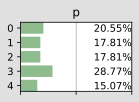

In [11]:
ie=gum.LazyPropagation(bn)
ie.makeInference()
gnb.showProba(ie.posterior("p"))

In [12]:
var = gum.DiscretizedVariable('Topic1', 'Potresti raccontarmi le difficoltà che riscontri quando studi?')
var.addTick(0)
var.addTick(1/3)
var.addTick(2/3)
var.addTick(1)

Topic1 = bn.add(var)

var = gum.DiscretizedVariable('Topic2', 'Potresti raccontarmi perché hai difficoltà a stringere amicizie?')
var.addTick(0)
var.addTick(1/3)
var.addTick(2/3)
var.addTick(1)

Topic2 =bn.add(var)

var = gum.DiscretizedVariable('Topic3', 'Potresti descrivermi nel dettaglio il tuo rapporto con i tuoi genitori?')
var.addTick(0)
var.addTick(1/3)
var.addTick(2/3)
var.addTick(1)

Topic3 =bn.add(var)



In [13]:
bn.addArc(p,Topic1)
bn.addArc(p,Topic2)
bn.addArc(p,Topic3)

In [21]:
bn.cpt('Topic1').fillWith(gum.randomDistribution(15))

(pyAgrum.Potential<double>@0x5a1fe1c9a730) 
      ||  Topic1                     |
p     ||[0;0.3333|[0.333333|[0.666667|
------||---------|---------|---------|
0     || 0.0363  | 0.0536  | 0.0044  |
1     || 0.0114  | 0.1223  | 0.0407  |
2     || 0.0432  | 0.1006  | 0.0192  |
3     || 0.1421  | 0.0399  | 0.0841  |
4     || 0.1088  | 0.0312  | 0.1623  |

In [22]:
bn.cpt('Topic2').fillWith(gum.randomDistribution(15))

(pyAgrum.Potential<double>@0x5a1fe0fa6010) 
      ||  Topic2                     |
p     ||[0;0.3333|[0.333333|[0.666667|
------||---------|---------|---------|
0     || 0.0953  | 0.1736  | 0.0848  |
1     || 0.0818  | 0.0055  | 0.1460  |
2     || 0.0012  | 0.0667  | 0.0409  |
3     || 0.0344  | 0.1330  | 0.0351  |
4     || 0.0543  | 0.0303  | 0.0173  |

In [23]:
bn.cpt('Topic3').fillWith(gum.randomDistribution(15))

(pyAgrum.Potential<double>@0x5a1fe1c317a0) 
      ||  Topic3                     |
p     ||[0;0.3333|[0.333333|[0.666667|
------||---------|---------|---------|
0     || 0.0821  | 0.0967  | 0.0989  |
1     || 0.0864  | 0.1086  | 0.0447  |
2     || 0.0020  | 0.1179  | 0.0188  |
3     || 0.1220  | 0.0398  | 0.0105  |
4     || 0.0904  | 0.0572  | 0.0242  |

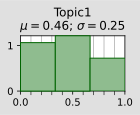

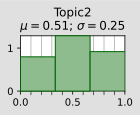

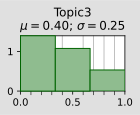

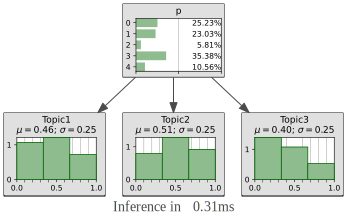

In [24]:
ie=gum.LazyPropagation(bn)
ie.makeInference()
gnb.showProba(ie.posterior("Topic1"))
gnb.showProba(ie.posterior("Topic2"))
gnb.showProba(ie.posterior("Topic3"))
gnb.showInference(bn)


In [25]:
print('Entropy of Topic1 is', ie.posterior('Topic1').entropy())
print('Entropy of Topic2 is', ie.posterior('Topic2').entropy())
print('Entropy of Topic3 is', ie.posterior('Topic3').entropy())

Entropy of Topic1 is 1.5531963614483506
Entropy of Topic2 is 1.5545739281318398
Entropy of Topic3 is 1.4866884903111457


In [ ]:
pip install neo4j

In [ ]:
from neo4j import GraphDatabase

# URI examples: "neo4j://localhost", "neo4j+s://xxx.databases.neo4j.io"
URI = "neo4j+s://85b0c276.databases.neo4j.io:7687"
AUTH = ("neo4j", "HoO3Xi8_f1rELFPWaiGAH_UswDErhK2K_t6QeyolOG4")

with GraphDatabase.driver(URI, auth=AUTH) as driver:
    driver.verify_connectivity()

In [19]:
!pip install azure-ai-textanalytics==5.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.3/239.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 7.3 MB/s eta 0:00:00



Potresti raccontarmi perché hai difficoltà a stringere amicizie?

Enter your answer: Sono timido ed impacciato, non riesco a socializzare con facilità.
Negative: 0.96
Neutral: 0.03
Positive: 0.01

Entropy of Topics before establishing the evidence:
Entropy of Topic1 is 1.5531963614483506
Entropy of Topic2 is 1.5545739281318398
Entropy of Topic3 is 1.4866884903111457

Negative, neutral, positive values before establishing the evidence:
Negative: 0.96
Neutral: 0.03
Positive: 0.01

BN before establishing the evidence



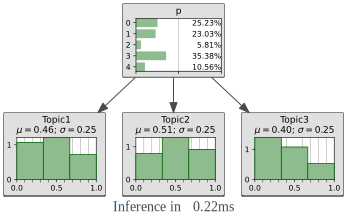


Personality node before establishing the evidence



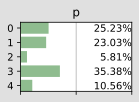


0.2522584179532529
0.2302547349495466
0.058063465592766
0.3538157703924383
0.10560761111199628

Node Topic1 before establishing the evidence



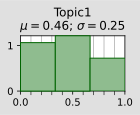


0.35451758625326824
0.4046543390235076
0.24082807472322415

Node Topic2 before establishing the evidence



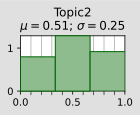


0.2656509347813843
0.4286709593240814
0.30567810589453437

Node Topic3 before establishing the evidence



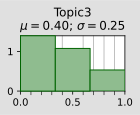


0.4645170788204623
0.3583841677416677
0.17709875343787

Dictionary before establishing the evidence
{}


Dictionary after establishing the evidence
{'p': array([0.27095813, 0.28107971, 0.00169334, 0.35635485, 0.08991397]), 'Topic2': array([0.96, 0.03, 0.01])}


Personality node after establishing the evidence



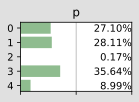


0.27095812954599185
0.28107970986280695
0.0016933359449210709
0.3563548506095729
0.08991397403670738

Node Topic1 after establishing the evidence



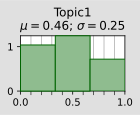


0.34580760700325974
0.41490379939506117
0.23928859360167914

Node Topic2 after establishing the evidence



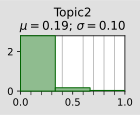


0.9330620909713854
0.05562317118483901
0.011314737843775666

Node Topic3 after establishing the evidence



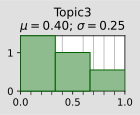


0.4811141428152368
0.33535430647831865
0.1835315507064445

Entropy of Topics after establishing the evidence:
Entropy of Topic1 is 1.5500331601907884
Entropy of Topic2 is 0.3982682399815127
Entropy of Topic3 is 1.4853388482181598

BN after establishing the evidence



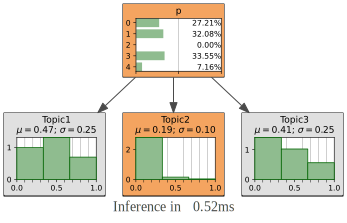


Potresti raccontarmi le difficoltà che riscontri quando studi?

Enter your answer: Non riesco a concentrarmi, sono sempre distratto.
Negative: 0.8
Neutral: 0.17
Positive: 0.02

Entropy of Topics before establishing the evidence:
Entropy of Topic1 is 1.5500331601907884
Entropy of Topic2 is 0.3982682399815127
Entropy of Topic3 is 1.4853388482181598

Negative, neutral, positive values before establishing the evidence:
Negative: 0.8
Neutral: 0.17
Positive: 0.02

BN before establishing the evidence



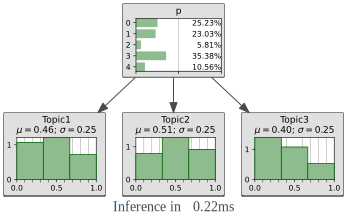


Personality node before establishing the evidence



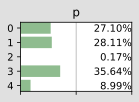


0.27095812954599185
0.28107970986280695
0.0016933359449210709
0.3563548506095729
0.08991397403670738

Node Topic1 before establishing the evidence



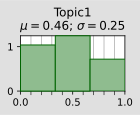


0.34580760700325974
0.41490379939506117
0.23928859360167914

Node Topic2 before establishing the evidence



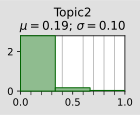


0.9330620909713854
0.05562317118483901
0.011314737843775666

Node Topic3 before establishing the evidence



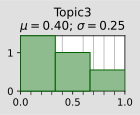


0.4811141428152368
0.33535430647831865
0.1835315507064445

Dictionary before establishing the evidence
{'p': array([0.27095813, 0.28107971, 0.00169334, 0.35635485, 0.08991397]), 'Topic2': array([0.96, 0.03, 0.01])}


Dictionary after establishing the evidence
{'p': array([3.21246367e-01, 1.64498029e-01, 4.29049883e-05, 4.48324056e-01,
       6.58886425e-02]), 'Topic2': array([0.96, 0.03, 0.01]), 'Topic1': array([0.8 , 0.17, 0.02])}


Personality node after establishing the evidence



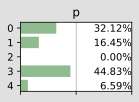


0.32124636713047655
0.1644980293678166
4.2904988344591947e-05
0.44832405602488057
0.06588864248848172

Node Topic1 after establishing the evidence



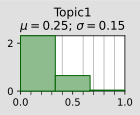


0.7700631154012377
0.21643157014699285
0.013505314451769402

Node Topic2 after establishing the evidence



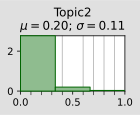


0.9232231062757369
0.0665547486890637
0.010222145035199342

Node Topic3 after establishing the evidence



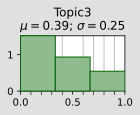


0.5064143643198169
0.3118924632939853
0.1816931723861977

Entropy of Topics after establishing the evidence:
Entropy of Topic1 is 0.8520334304860291
Entropy of Topic2 is 0.4341742109064798
Entropy of Topic3 is 1.468397125835587

BN after establishing the evidence



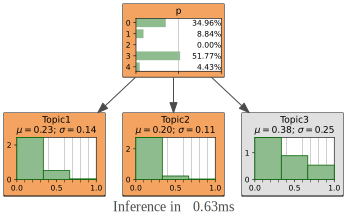


Potresti descrivermi nel dettaglio il tuo rapporto con i tuoi genitori?

Enter your answer: Litigo spesso con loro, non mi sento supportato. Ho l'impressione di non riuscire a soddisfare le loro aspettative.
Negative: 0.88
Neutral: 0.11
Positive: 0.01

Entropy of Topics before establishing the evidence:
Entropy of Topic1 is 0.8520334304860291
Entropy of Topic2 is 0.4341742109064798
Entropy of Topic3 is 1.468397125835587

Negative, neutral, positive values before establishing the evidence:
Negative: 0.88
Neutral: 0.11
Positive: 0.01

BN before establishing the evidence



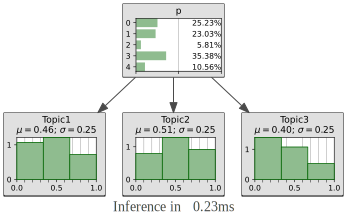


Personality node before establishing the evidence



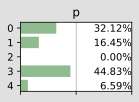


0.32124636713047655
0.1644980293678166
4.2904988344591947e-05
0.44832405602488057
0.06588864248848172

Node Topic1 before establishing the evidence



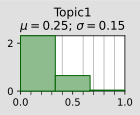


0.7700631154012377
0.21643157014699285
0.013505314451769402

Node Topic2 before establishing the evidence



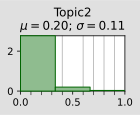


0.9232231062757369
0.0665547486890637
0.010222145035199342

Node Topic3 before establishing the evidence



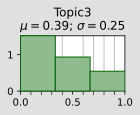


0.5064143643198169
0.3118924632939853
0.1816931723861977

Dictionary before establishing the evidence
{'p': array([3.21246367e-01, 1.64498029e-01, 4.29049883e-05, 4.48324056e-01,
       6.58886425e-02]), 'Topic2': array([0.96, 0.03, 0.01]), 'Topic1': array([0.8 , 0.17, 0.02])}


Dictionary after establishing the evidence
{'p': array([2.12694679e-01, 6.56661719e-02, 2.15666798e-07, 6.76914587e-01,
       4.47243459e-02]), 'Topic2': array([0.96, 0.03, 0.01]), 'Topic1': array([0.8 , 0.17, 0.02]), 'Topic3': array([0.88, 0.11, 0.01])}


Personality node after establishing the evidence



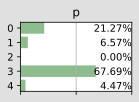


0.2126946792446602
0.06566617187237704
2.1566679835809433e-07
0.6769145873021805
0.04472434591398394

Node Topic1 after establishing the evidence



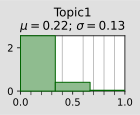


0.851754791644699
0.13517643518056213
0.013068773174738826

Node Topic2 after establishing the evidence



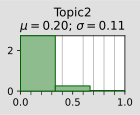


0.9058452118649647
0.08460267875288759
0.009552109382147829

Node Topic3 after establishing the evidence



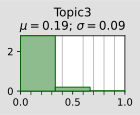


0.930798498177881
0.06560065699193328
0.003600844830185868

Entropy of Topics after establishing the evidence:
Entropy of Topic1 is 0.6692193290449471
Entropy of Topic2 is 0.49477768546840123
Entropy of Topic3 is 0.3833495076301596

BN after establishing the evidence



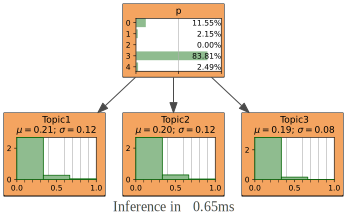


Potresti raccontarmi le difficoltà che riscontri quando studi?



KeyboardInterrupt: ignored

In [26]:
def create_a_node(tx, user_answer):
    tx.run("CREATE (n:Utterance {text: $user_answer})", user_answer = user_answer)


def rec_interactions(tx, user_answer):
    tx.run(
        "MATCH (n:Utterance) WHERE NOT EXISTS ((n)-[:FOLLOWED_BY]->(:Utterance)) WITH n "
        "CREATE (n2:Utterance {text: $user_answer}) "
        "CREATE (n)-[:FOLLOWED_BY]->(n2)", user_answer = user_answer)

language_key = "fb821673335b408f9b324740f5c3291a"
language_endpoint = "https://psymonitor.cognitiveservices.azure.com/"

from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential


def analyseSentiment(text):
    ta_credential = AzureKeyCredential(language_key)
    text_analytics_client = TextAnalyticsClient(
        endpoint=language_endpoint,
        credential=ta_credential)
    return text_analytics_client.analyze_sentiment([text], show_opinion_mining=True)[0]


def maxEntropy(dictionary):
    max_elem_name = max(dictionary.items(), key=lambda x: x[1])[0]
    return max_elem_name

negative = 0
neutral = 0
positive = 0

personality = zeros(5)

personality[0] = val_1
personality[1] = val_2
personality[2] = val_3
personality[3] = val_4
personality[4] = val_5

list_of_evi = {}

def setEvidence(max_elem_name, neg, neu, pos, f_1, f_2, f_3, f_4, f_5):
    global topic_sen_dis
    topic_sen_dis = zeros(3)
    topic_sen_dis[0] = neg
    topic_sen_dis[1] = neu
    topic_sen_dis[2] = pos
    personality[0] = f_1
    personality[1] = f_2
    personality[2] = f_3
    personality[3] = f_4
    personality[4] = f_5
    list_of_evi['p'] = personality
    list_of_evi[max_elem_name] = topic_sen_dis
    ie.setEvidence(list_of_evi)

#ie.setEvidence({'p': personality})
node_count = 0

while True:
    d = {'Topic1': ie.posterior('Topic1').entropy(), 'Topic2': ie.posterior('Topic2').entropy(), 'Topic3': ie.posterior('Topic3').entropy()}
    max_ent_elem = maxEntropy(d)

    print()
    print(bn.variableFromName(max_ent_elem).description())

    print()
    answer = input("Enter your answer: ")
    result = analyseSentiment(answer)

    if node_count == 0:
      with driver.session(database="neo4j") as session:
        session.execute_write(create_a_node, answer)
      node_count += 1
    else:
      with driver.session(database="neo4j") as session:
        session.execute_write(rec_interactions, answer)

    # result = analyseSentiment("Non mi piace il corso di programmazione. Il prof mi odia.")
    negative = result.confidence_scores.negative
    neutral = result.confidence_scores.neutral
    positive = result.confidence_scores.positive
    print("Negative: {}".format(result.confidence_scores.negative))
    print("Neutral: {}".format(result.confidence_scores.neutral))
    print("Positive: {}".format(result.confidence_scores.positive))
    for mined_opinion in result.sentences[0].mined_opinions:
        target = mined_opinion.target
        print("'{}' target '{}'".format(target.sentiment, target.text))
        print("Target score:\nPositive={0:.2f}\nNegative={1:.2f}\n".format(
            target.confidence_scores.positive,
            target.confidence_scores.negative,
        ))
        for assessment in mined_opinion.assessments:
            print("'{}' assessment '{}'".format(assessment.sentiment, assessment.text))
            print("Assessment score:\nPositive={0:.2f}\nNegative={1:.2f}\n".format(
                assessment.confidence_scores.positive,
                assessment.confidence_scores.negative,
            ))

    print()
    print('Entropy of Topics before establishing the evidence:')
    print('Entropy of Topic1 is', ie.posterior('Topic1').entropy())
    print('Entropy of Topic2 is', ie.posterior('Topic2').entropy())
    print('Entropy of Topic3 is', ie.posterior('Topic3').entropy())

    print()
    print("Negative, neutral, positive values before establishing the evidence:")
    print("Negative:", negative)
    print("Neutral:", neutral)
    print("Positive:", positive)

    print()
    print("BN before establishing the evidence")
    print()
    ie.makeInference()
    gnb.showInference(bn)

    print()
    print("Personality node before establishing the evidence")
    print()
    gnb.showProba(ie.posterior("p"))
    print()
    print(ie.posterior('p')[0])
    print(ie.posterior('p')[1])
    print(ie.posterior('p')[2])
    print(ie.posterior('p')[3])
    print(ie.posterior('p')[4])

    print()
    print("Node Topic1 before establishing the evidence")
    print()
    gnb.showProba(ie.posterior("Topic1"))
    print()
    print(ie.posterior('Topic1')[0])
    print(ie.posterior('Topic1')[1])
    print(ie.posterior('Topic1')[2])

    print()
    print("Node Topic2 before establishing the evidence")
    print()
    gnb.showProba(ie.posterior("Topic2"))
    print()
    print(ie.posterior('Topic2')[0])
    print(ie.posterior('Topic2')[1])
    print(ie.posterior('Topic2')[2])

    print()
    print("Node Topic3 before establishing the evidence")
    print()
    gnb.showProba(ie.posterior("Topic3"))
    print()
    print(ie.posterior('Topic3')[0])
    print(ie.posterior('Topic3')[1])
    print(ie.posterior('Topic3')[2])

    print()
    print("Dictionary before establishing the evidence")
    print(list_of_evi)
    print()

    val_1 = ie.posterior('p')[0]
    val_2 = ie.posterior('p')[1]
    val_3 = ie.posterior('p')[2]
    val_4 = ie.posterior('p')[3]
    val_5 = ie.posterior('p')[4]

    setEvidence(max_ent_elem, negative, neutral, positive, val_1, val_2, val_3, val_4, val_5)

    personality[0] = ie.posterior('p')[0]
    personality[1] = ie.posterior('p')[1]
    personality[2] = ie.posterior('p')[2]
    personality[3] = ie.posterior('p')[3]
    personality[4] = ie.posterior('p')[4]

    list_of_evi['p'] = personality

    print()
    print("Dictionary after establishing the evidence")
    print(list_of_evi)
    print()

    print()
    print("Personality node after establishing the evidence")
    print()
    ie.makeInference()
    gnb.showProba(ie.posterior("p"))
    print()
    print(ie.posterior('p')[0])
    print(ie.posterior('p')[1])
    print(ie.posterior('p')[2])
    print(ie.posterior('p')[3])
    print(ie.posterior('p')[4])

    print()
    print("Node Topic1 after establishing the evidence")
    print()
    gnb.showProba(ie.posterior("Topic1"))
    print()
    print(ie.posterior('Topic1')[0])
    print(ie.posterior('Topic1')[1])
    print(ie.posterior('Topic1')[2])

    print()
    print("Node Topic2 after establishing the evidence")
    print()
    gnb.showProba(ie.posterior("Topic2"))
    print()
    print(ie.posterior('Topic2')[0])
    print(ie.posterior('Topic2')[1])
    print(ie.posterior('Topic2')[2])

    print()
    print("Node Topic3 after establishing the evidence")
    print()
    gnb.showProba(ie.posterior("Topic3"))
    print()
    print(ie.posterior('Topic3')[0])
    print(ie.posterior('Topic3')[1])
    print(ie.posterior('Topic3')[2])

    print()
    print('Entropy of Topics after establishing the evidence:')
    print('Entropy of Topic1 is', ie.posterior('Topic1').entropy())
    print('Entropy of Topic2 is', ie.posterior('Topic2').entropy())
    print('Entropy of Topic3 is', ie.posterior('Topic3').entropy())

    print()
    print("BN after establishing the evidence")
    print()
    gnb.showInference(bn, evs = list_of_evi)